# Explore Tara Geographically

In [15]:
from importlib import reload

import numpy as np
from datetime import datetime, time
import random 

import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy
import corner

from oceancolor.tara import io as tara_io
from oceancolor.ph import pigments

from cnmf.oceanography import iops
from cnmf import zhu_nmf as nmf
from cnmf import io as cnmf_io

In [16]:
%matplotlib ipympl

In [17]:
tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

# Load up Tara fitted with L23

In [3]:
# Load Tara
N_NMF, iop = 4, 'a'
d_tara = cnmf_io.load_nmf('Tara_L23', N_NMF, iop)
tara_coeff = d_tara['coeff']
tara_wave = d_tara['wave']

In [19]:
d_tara.keys()

KeysView(NpzFile '/home/xavier/Projects/Oceanography/python/cnmf/cnmf/data/Tara_L23/Tara_L23_NMF_04_a.npz' with keys: M, coeff, spec, mask, err...)

In [4]:
df_tara = pandas.DataFrame()
df_tara['a1'] = tara_coeff[0,:]

# Examine high $a_1$

## Histogram first

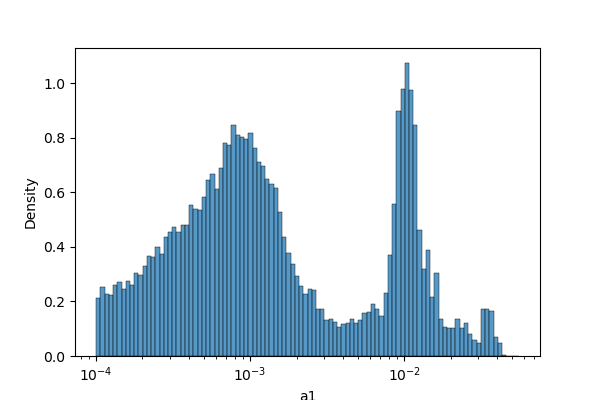

In [11]:
ss=0
df = df_tara
keep = df[f'a{ss+1}'] > 1e-4
#
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
sns.histplot(df[keep], x=f'a{ss+1}',
             bins=100, ax=ax,
        common_bins=True, stat='density', common_norm=False,
        log_scale=True)
plt.show()

## Geo me

In [12]:
high = df_tara.a1 > 0.007

NameError: name 'tara_2010' is not defined

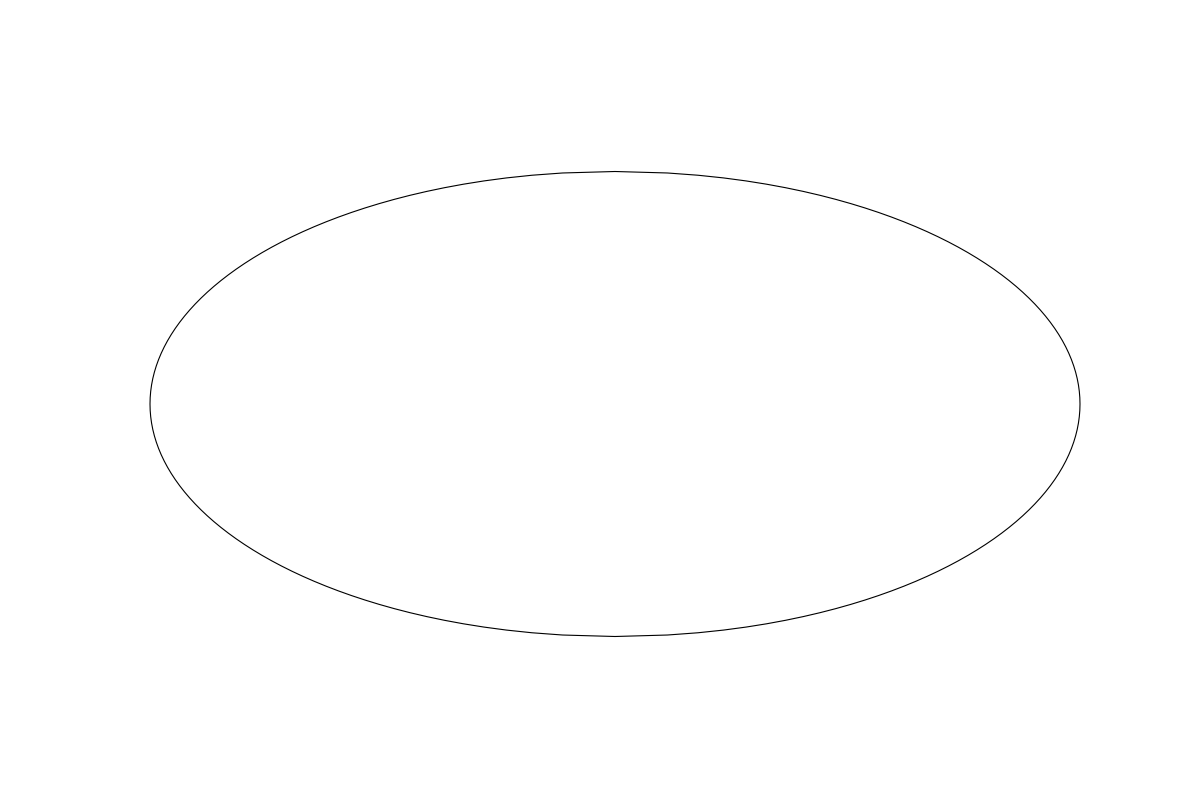

In [18]:
fig = plt.figure(figsize=(12,8))
plt.clf()

ax = plt.subplot(projection=tformM)

for cruise in np.unique(tara_2010.cruise):
    on_cruise = tara_2010.cruise == cruise
    img = plt.scatter(x=tara_2010[on_cruise].lon,
        y=tara_2010[on_cruise].lat,
        #c=hp_plot[good], 
        #cmap=cm,
        #vmin=0.,
        #vmax=vmax, 
        s=1,
        transform=tformP,
                     label=cruise)

# Coast lines
ax.coastlines(zorder=10)
ax.add_feature(cartopy.feature.LAND, 
    facecolor='lightgray', edgecolor='black')
ax.set_global()
ax.legend(loc='lower left')

plt.show()